In [1]:
# Load the needed packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Seed the random generator
np.random.seed(42)

'''
Generate a data set and load it into a DataFrame.
The DataFrame will consist of 700 rows (each corresponds to a diabetic patient) and 5 columns: 
1. Type: It refers to the type of diabetes. Note: that Type 2 is more common than Type 1.
2. Area: It states the area of the patients (350 patients from the Middle East countries and 350 patients form East Asia).
3. Age at Diagnosis: This column was generated to have a bimodal distribution reflecting that type 1 is
more common in children while type 2 is more common in adults. 
4. Weight: Similarly to the Age at Diagnosis column, the Weight column was generated to ensure that Type 1 patients 
have low weights. 
5. Insulin Dose: The Insulin Dose column was generated to have a direct relationship with the Weight column. 
'''
Dict = {}
Dict['Type'] = ['Type 1']*175 + ['Type 2']*525
Dict['Area'] = ["Middle East"]*50 + ['East Asia']*125 + ["Middle East"]*300 + ['East Asia']*225 
Dict['Age at Diagnosis'] = (list(np.random.normal(14,3,145))
                        +list(np.random.randint(20,30,30))
                        +list(np.random.randint(20,40,125))
                        +list(np.random.normal(45,5,400)))
Dict['Age at Diagnosis'] = [int(x) for x in Dict['Age at Diagnosis']]
Dict['Weight'] = (list(np.random.randint(45,70,200))
                  +list(np.random.randint(70,90,75))
                  +list(np.random.randint(90,120,225))
                  +list(np.random.randint(70,90,200)))
Dict['Insulin Dose'] = [round(x*np.random.choice([0.55,0.7]) + np.random.choice(list(range(-15,20))),1) for x in Dict['Weight']]
df = pd.DataFrame(Dict)
df = df.sample(700).reset_index(drop=True)
df.head()

,Type,Area,Age at Diagnosis,Weight,Insulin Dose
0,Type 2,Middle East,38,118,50.9
1,Type 1,East Asia,13,53,34.2
2,Type 1,Middle East,14,63,46.7
3,Type 1,East Asia,12,50,19.5
4,Type 2,Middle East,48,98,68.9


# Univariate Data Visualizations 

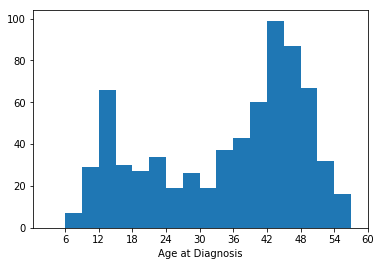

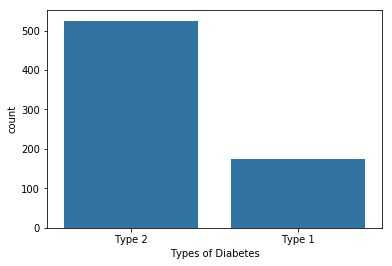

In [2]:
# Plot a histogram and save it as jpg file
plt.hist(data=df, x='Age at Diagnosis',bins=range(3,60,3))
plt.xlabel('Age at Diagnosis')
plt.xticks(range(6,66,6))
plt.savefig('Age at Diagnosis.jpg')
plt.show()

# Plot a bar chart and save it as jpg file
sb.countplot(data=df,x='Type',color=sb.color_palette()[0])
plt.xlabel('Types of Diabetes')
plt.savefig('Type.jpg')
plt.show()

# Bivariate Data Visualizations 

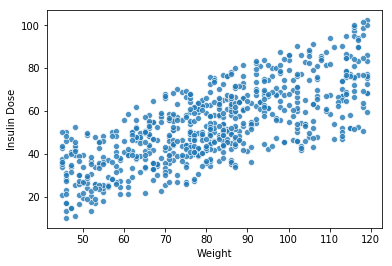

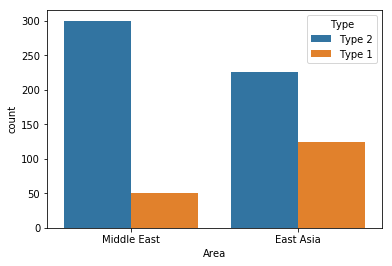

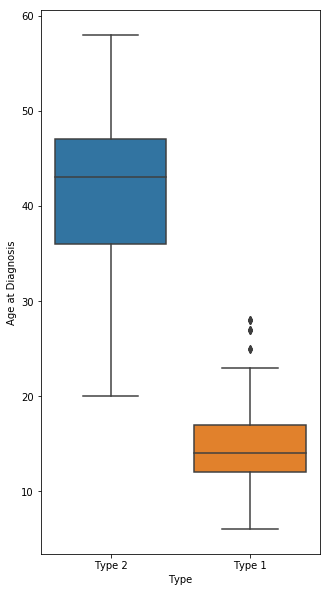

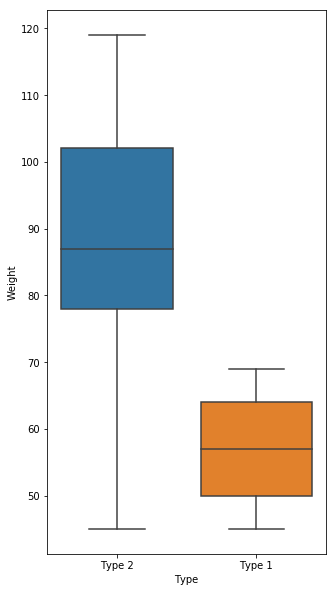

In [3]:
# Plot a scatter plot and save it as jpg file
sb.scatterplot(data=df, y='Insulin Dose',x='Weight',alpha=0.8)
plt.savefig('Weight and Insulin Dose.jpg')
plt.show()

# Plot a clustered bar chart and save it as jpg file
sb.countplot(data=df,x='Area',hue='Type')
plt.savefig('Area and Type.jpg')
plt.show()

# Plot a box and save it as jpg file
plt.figure(figsize=[5,10])
sb.boxplot(data=df, y='Age at Diagnosis',x='Type')
plt.savefig('Age at Diagnosis and Type.jpg')
plt.show()

# Plot a box and save it as jpg file
plt.figure(figsize=[5,10])
sb.boxplot(data=df, y='Weight',x='Type')
plt.savefig('Weight and Area.jpg')
plt.show()